In [1]:
from utils.scraping import *

In [ ]:
result_type = ["true","mostly-true","half-true","barely-true","false","pants-fire"]
a = 0
statement_str = []
long_answer_str =  []
short_answer_str = []
state_lst = []
reviewer_lst = []
date_lst = []
id_lst = []
tags_lst = []
site_lst = []
for counter in range(1,200):
    print("Page '{}' begins...".format(counter))
    for state in result_type:
        print("State '{}' begins...".format(state))
        try:
            url_str = "https://www.politifact.com/factchecks/list/?page={}&ruling={}".format(counter,state)
            response = requests.get(url_str)
        except:
            print("Error: Side {} could not be intiliazed!".format(url_str))
            continue
        #print(response)
        soup = BeautifulSoup(response.text, "html.parser")
        statement_footer =  soup.find_all('div',attrs={'class':'m-statement__quote'})

        for i in range(len(statement_footer)):
            
            statement= get_href(str(statement_footer[i].find(href=True)))
            
            try:
                stat = get_statement(str(statement_footer[i].find(href=True)))
            except:
                stat = ""
                print("Warning: Could not get statement, leave it empty and continue")
            
            try:
                tag = get_tags(statement)
            except:
                tag = ""
                print("Warning: Could not get tags, leave it empty and continue")
                
            try:
                review_info = reviewer_date(soup)
                reviewer = review_info[i][0]
                date = review_info[i][1]
            except:
                reviewer = ""
                date = ""
                print("Warning: Could not get review_info, leave it empty and continue")
                
                
            #print(statement)
            try:
                ls_texts = get_long_short_texts(statement)
                if ls_texts is None:
                    raise ValueError()
                long_answer_str.append(ls_texts[0])
                short_answer_str.append(ls_texts[1])
            except:
                try:
                    ls_texts = get_long_short_second_approach(statement)
                    if ls_texts is None:
                        raise ValueError()
                    long_answer_str.append(ls_texts[0])
                    short_answer_str.append(ls_texts[1])
                except:
                    try:
                        ls_texts = get_long_short_third_approach(statement)
                        if ls_texts is None:
                            raise ValueError()
                        long_answer_str.append(ls_texts[0])
                        short_answer_str.append(ls_texts[1])
                    except:                   
                        print("Error: Problem with side https://www.politifact.com{}, will skip this one!".format(statement))
                        continue
                        
            statement_str.append(stat)
            state_lst.append(state)
            tags_lst.append(tag)
            reviewer_lst.append(reviewer)
            date_lst.append(date)
            site_lst.append("https://www.politifact.com{}".format(statement))
            a += 1
            id_lst.append(a)
            print("Total successfull {}".format(a))
                
                    
data_df = pd.DataFrame(
            {
                'id': id_lst,
                'reviewer': reviewer_lst,
                'date':  date_lst,
                'statement': statement_str,
                'explanation': long_answer_str,
                'shortExplanation': short_answer_str,
                'truth_o_meter': state_lst,
                'tags': tags_lst,
                'url': site_lst
                }
)

# Remove duplicated statements about 10 explanations

data_df = data_df.drop_duplicates(subset=['statement', 'explanation', 'shortExplanation'])

data_df.to_csv("./Data/Raw/data_with_filled_explanations_17.2.2022.csv")
data_df.to_pickle("./Data/Raw/data_with_filled_explanations_17.2.2022.pickle")

Page '1' begins...
State 'true' begins...
Total successfull 1
Total successfull 2
Total successfull 3
Total successfull 4
Total successfull 5
Total successfull 6
Total successfull 7
Total successfull 8
Total successfull 9
Total successfull 10
Total successfull 11
Total successfull 12
Total successfull 13
Total successfull 14
Total successfull 15
Total successfull 16
Total successfull 17
Total successfull 18
Total successfull 19
Total successfull 20
Total successfull 21
Total successfull 22
Total successfull 23
Total successfull 24
Total successfull 25
Total successfull 26
Total successfull 27
Total successfull 28
Total successfull 29
Total successfull 30
State 'mostly-true' begins...
Total successfull 31
Total successfull 32
Total successfull 33
Total successfull 34
Total successfull 35
Total successfull 36
Total successfull 37
Total successfull 38
Total successfull 39
Total successfull 40
Total successfull 41
Total successfull 42
Total successfull 43
Total successfull 44
Total success

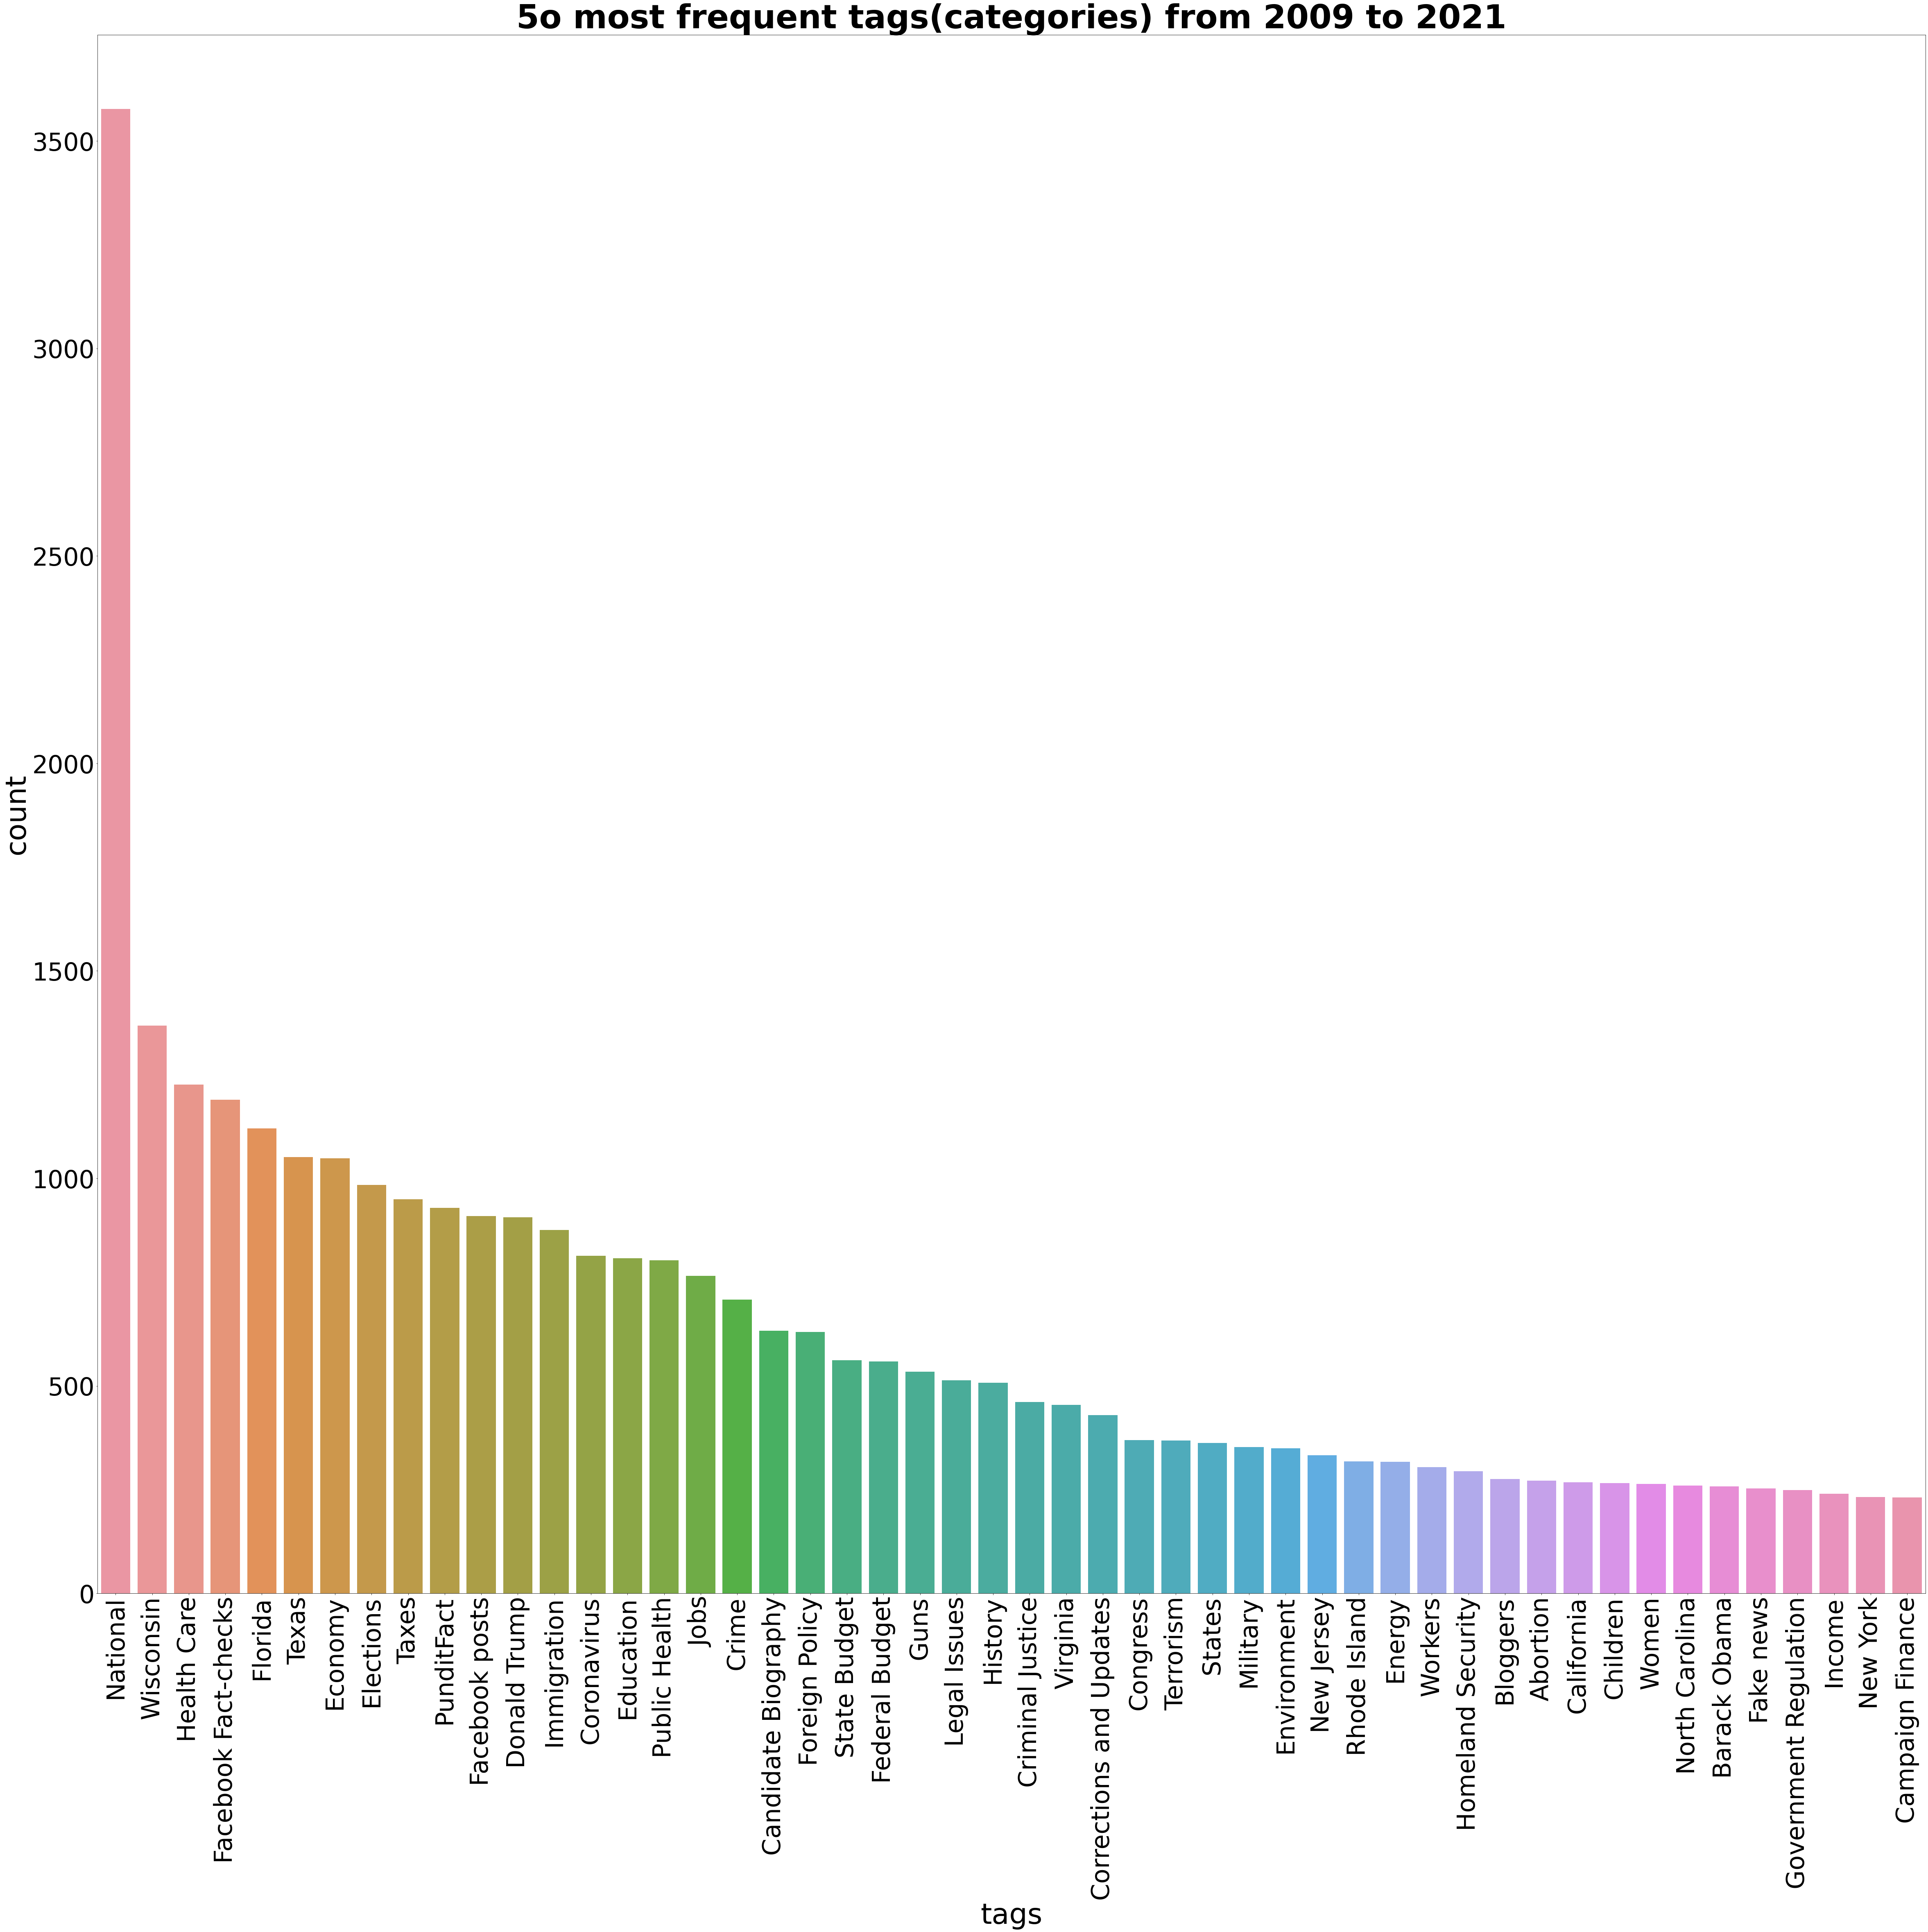

In [31]:
set_graph('tags','5o most frequent tags(categories) from 2009 to 2021', Order = True)

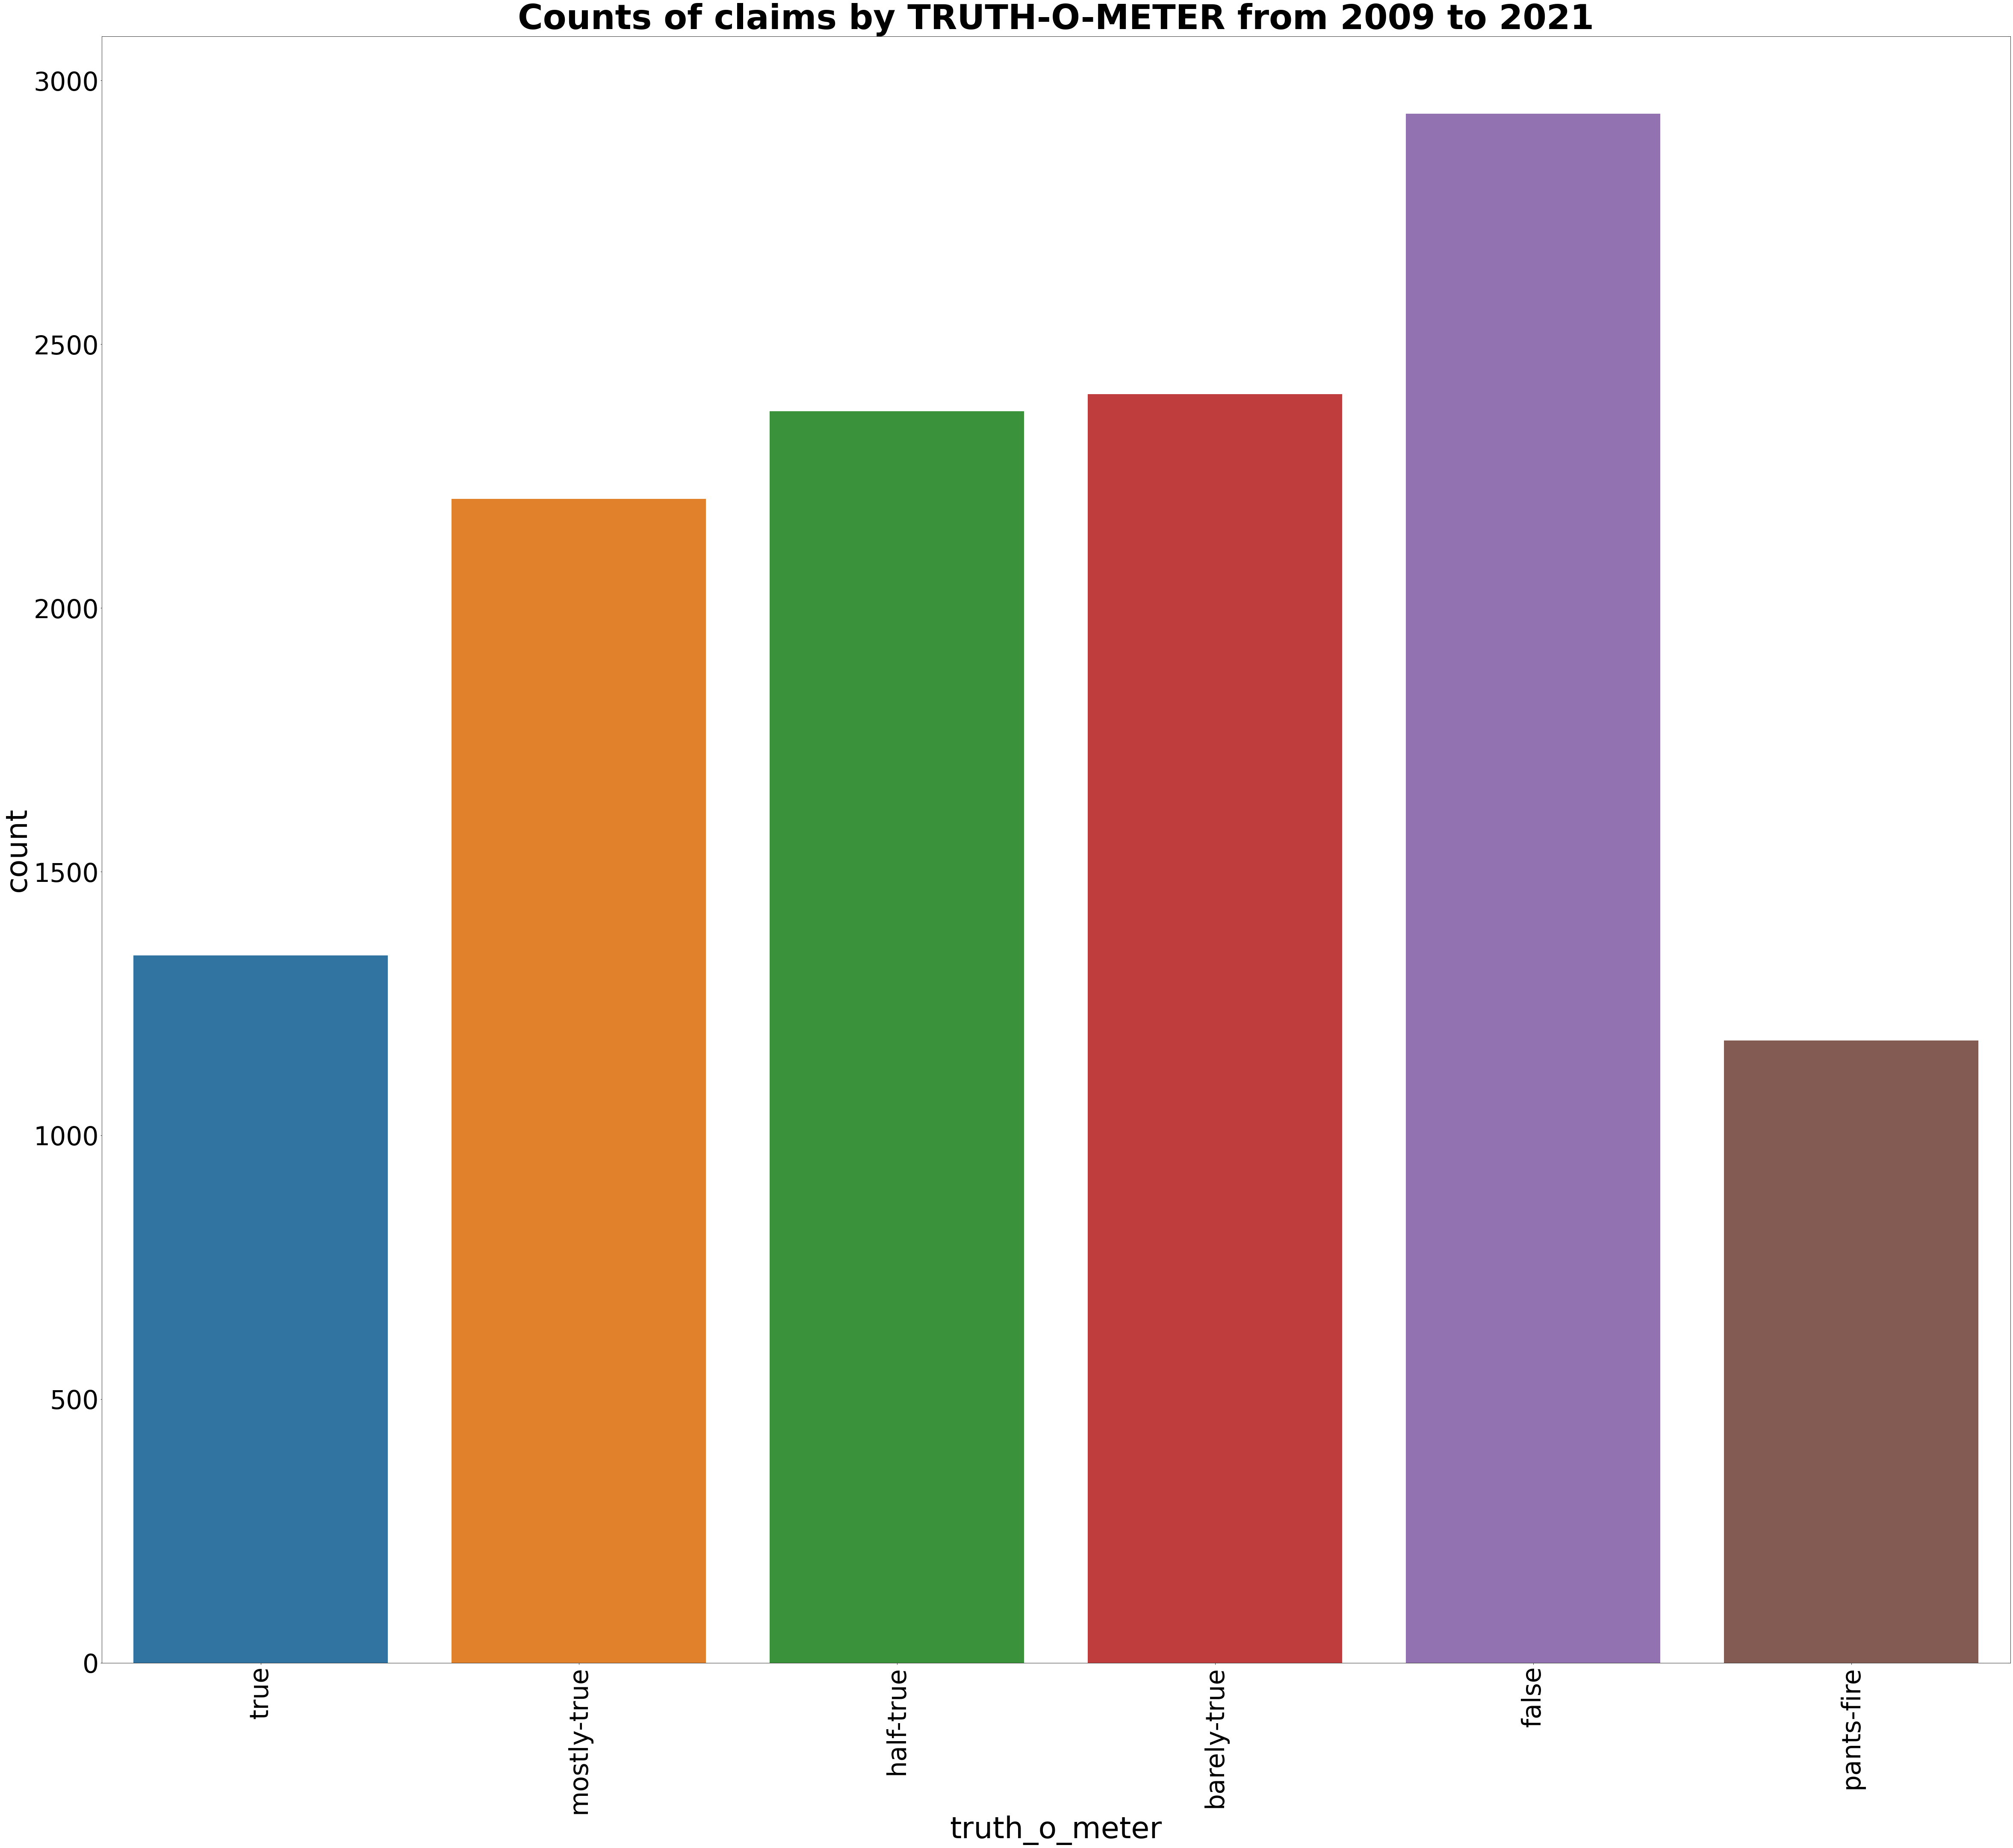

In [77]:
set_graph('truth_o_meter','Counts of claims by TRUTH-O-METER from 2009 to 2021')

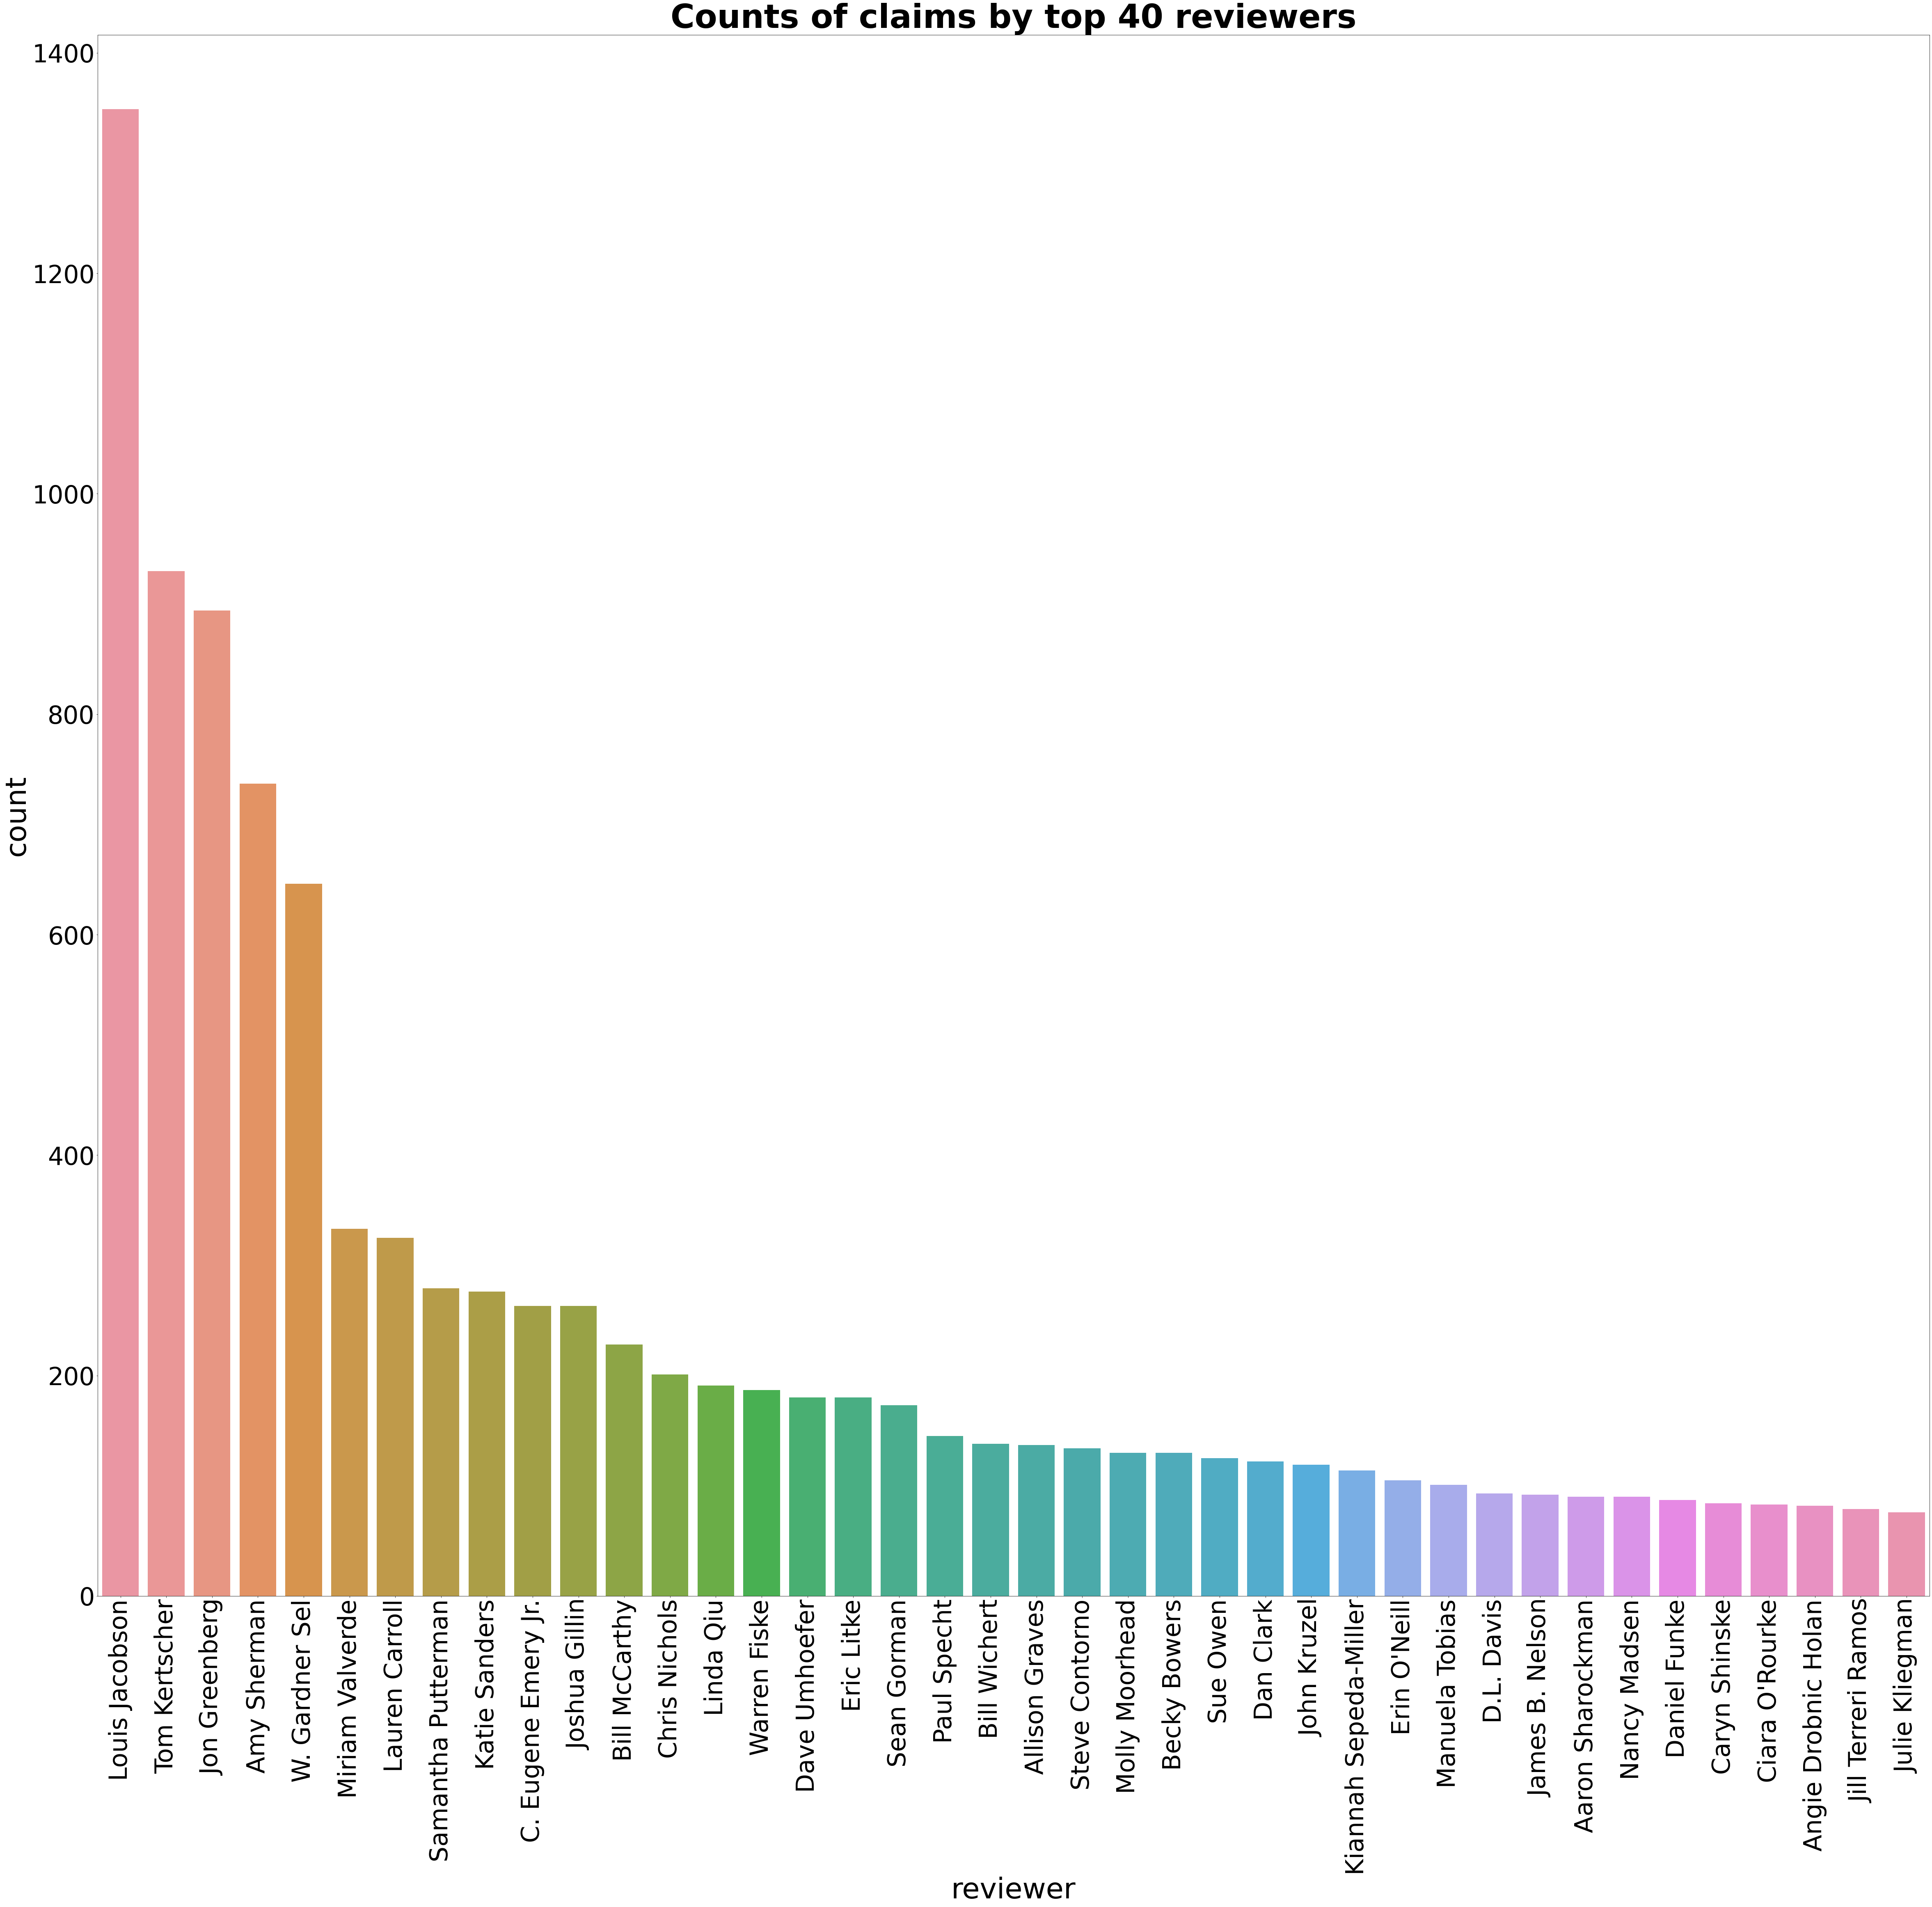

In [78]:
set_graph('reviewer','Counts of claims by top 40 reviewers',Order = True)

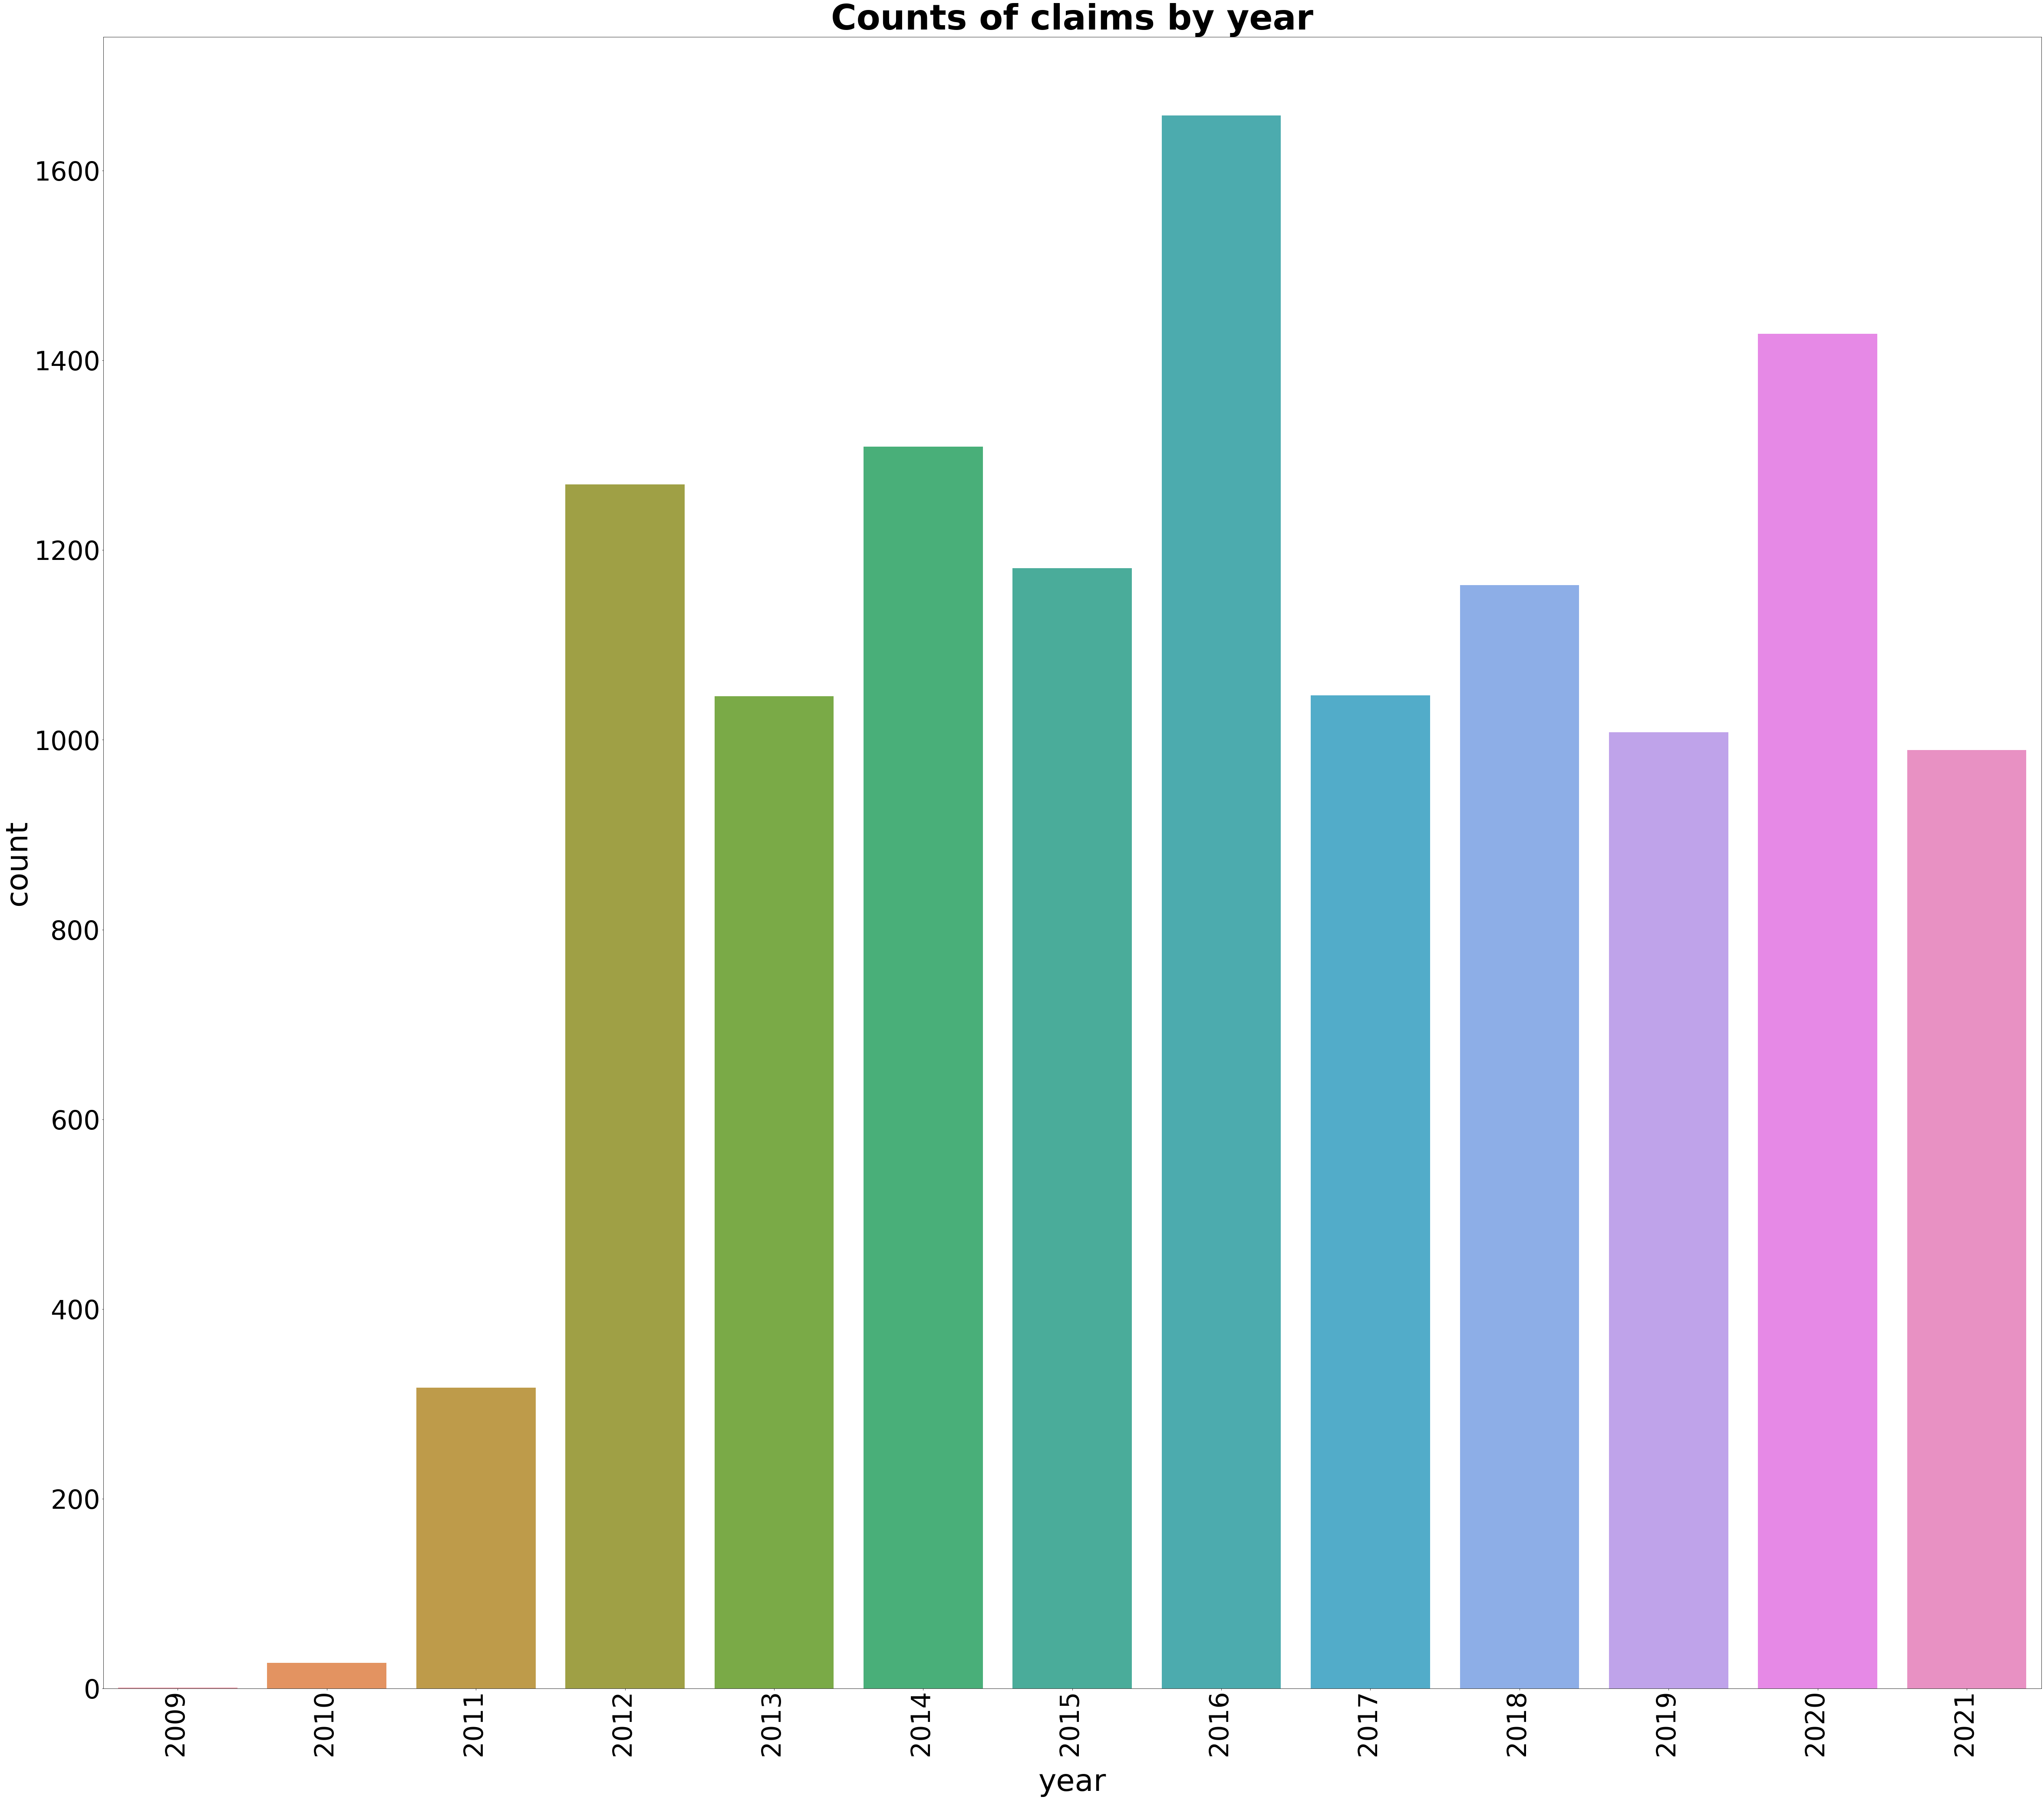

In [80]:
set_graph('year','Counts of claims by year')